<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Обучение-без-преобразования" data-toc-modified-id="Обучение-без-преобразования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение без преобразования</a></span></li><li><span><a href="#Обучение-с-преобразованием" data-toc-modified-id="Обучение-с-преобразованием-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение с преобразованием</a></span></li></ul></li><li><span><a href="#вывод" data-toc-modified-id="вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
df= pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
def data_analis (df):
    i=df.info()
    h=df.head()
    ds=df.describe()
    dp=df.duplicated().sum()
    return print(i),print(h), print(ds), print('дубликаты:',dp)

In [4]:
data_analis (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0
               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.0000

(None, None, None, None)

In [5]:
df = df.drop_duplicates()
df[['Возраст', 'Зарплата']] = df[['Возраст', 'Зарплата']].astype(int)
df.info()
print()
print('Количество дубликатов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB

Количество дубликатов: 0


<AxesSubplot:>

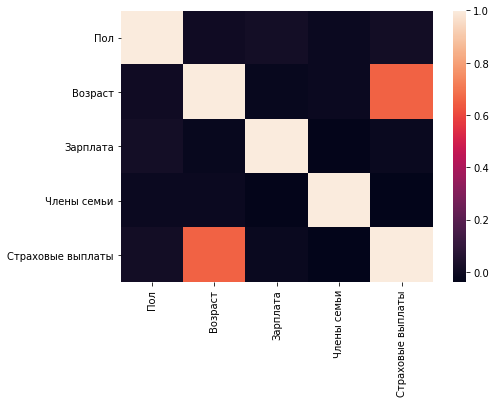

In [6]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr())

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** останется прежним

**Обоснование:** 

$
X' =  XP $,где Р - обратимая матрица, на которую умножается матрица Х.

Рассчитываем новый вектор весов:

$w' = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y = P^{-1}w$,

где

$(P^T)^{-1} P^T = E$  

Тогда: 

$a' = X'w' = XPP^{-1} w = XEw = Xw = a$ 

Предсказания модели не изменились, соответственно качество осталось прежним.

## Алгоритм преобразования

**Алгоритм**

Создадим случайную матрицу Р с размерностью, равной количеству признаков.

Проверим матрицы Р на обратимость. Если матрица вдруг окажется необратимой, создадим новую.

Умножим матрицу Р на матрицу признаков Х и получим матрицу преобразованных признаков Х'.

**Обоснование**

При умножении признаков на обратимую матрицу качество линейной регрессии не меняется, а значит алгоритм поможет защитить персональную информацию клиентов, но не повлияет на работу модели.

## Проверка алгоритма

In [7]:
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

print('Признаки:', features.shape)
print('Целевой признак:', target.shape)

Признаки: (4847, 4)
Целевой признак: (4847,)


In [8]:
def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
        det = np.linalg.det(matrix)
    return matrix
matrix=get_rand_matrix()

In [9]:
new_matrix = features.values @ get_rand_matrix()
new_matrix

array([[ 4870.41403934,  3390.68301165,  8742.52992989, 98195.85430137],
       [ 3708.91815126,  2621.26057964,  6687.79661982, 75254.0866388 ],
       [ 2043.94853597,  1454.55159112,  3692.38961396, 41594.00563969],
       ...,
       [ 3341.10075932,  2304.39406995,  5984.08671039, 67099.61649076],
       [ 3220.14869902,  2226.10799753,  5770.15434749, 64728.10796845],
       [ 3995.29743305,  2766.39283543,  7160.52473416, 80368.92524139]])

### Обучение без преобразования

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [11]:
model_1 = LinearRegression()
model_1.fit(features_train, target_train)
predictions_1 = model_1.predict(features_test)
r2_1 = r2_score(target_test, predictions_1)

print('R2:', r2_1)

R2: 0.42307727615837565


### Обучение с преобразованием

In [12]:
enc_features_train, enc_features_test, enc_target_train, enc_target_test = train_test_split(
    new_matrix, target, test_size=0.25, random_state=12345)

In [13]:
model_2 = LinearRegression()
model_2.fit(enc_features_train, enc_target_train)
predictions_2 = model_2.predict(enc_features_test)
r2_2 = r2_score(enc_target_test, predictions_2)

print('R2:', r2_2)

R2: 0.4230772761583369


## вывод

Для защиты данных клиентов был предложен метод преобразования данных путем умножения признаков на обратимую матрицу, не теряя при этом качество линейной регрессии.